In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#Define ReLU and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [57]:
#Inputs and target
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

In [58]:
#Set parameters, initialize weights and biases
input_size = 1
hidden_layer = 100
output_size = 1

# Initialize weights and biases
w1 = np.random.randn(input_size, hidden_layer)
b1 = np.random.randn(hidden_layer)
w2 = np.random.randn(hidden_layer, output_size)
b2 = np.random.randn(output_size)


In [59]:
#Define forward prop
def forward_propagation(X, w1, b1, w2, b2):
    layer1_output = relu(X @ w1 + b1)
    Y_pred = layer1_output @ w2 + b2
    return Y_pred

In [60]:
#Save weights/bias at epochs for plots
epoch_check = [10, 100, 200, 400, 1000]
w1_epoch = {epoch: None for epoch in epoch_check}
w2_epoch = {epoch: None for epoch in epoch_check}
b1_epoch = {epoch: None for epoch in epoch_check}
b2_epoch = {epoch: None for epoch in epoch_check}

In [61]:
#Training
learning_rate = 0.001
epochs = 1000
errors = []

for epoch in range(epochs + 1):
    #Forward
    layer1_output = relu(np.dot(X.reshape(-1, 1), w1) + b1)
    Y_pred = np.dot(layer1_output, w2) + b2
    
    #Calculate error
    error = np.mean(0.5 * (Y_pred.reshape(-1) - Y) ** 2)
    errors.append(error)
    
    #Store data at specified epochs for plots
    if epoch in epoch_check:
        w1_epoch[epoch] = w1.copy()
        w2_epoch[epoch] = w2.copy()
        b1_epoch[epoch] = b1.copy()
        b2_epoch[epoch] = b2.copy()
    
    #Backprop
    d_error = Y_pred.reshape(-1) - Y
    d_w2 = layer1_output.T @ d_error.reshape(-1, 1)
    d_b2 = np.sum(d_error, axis=0)
    
    d_layer1 = d_error.reshape(-1, 1) @ w2.T * relu_derivative(layer1_output)
    d_w1 = X.reshape(-1, 1).T @ d_layer1
    d_b1 = np.sum(d_layer1, axis=0)
    
    #Update weights and biases
    w1 -= learning_rate * d_w1
    b1 -= learning_rate * d_b1
    w2 -= learning_rate * d_w2
    b2 -= learning_rate * d_b2


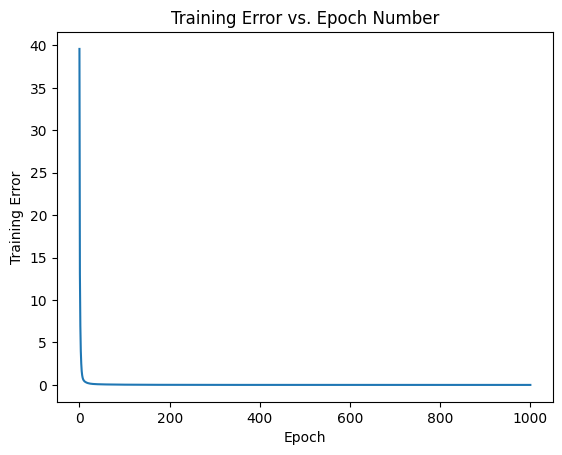

In [62]:
plt.figure()
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')
plt.show()

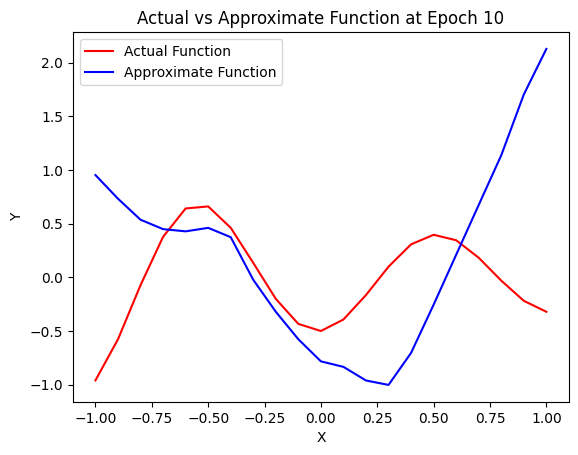

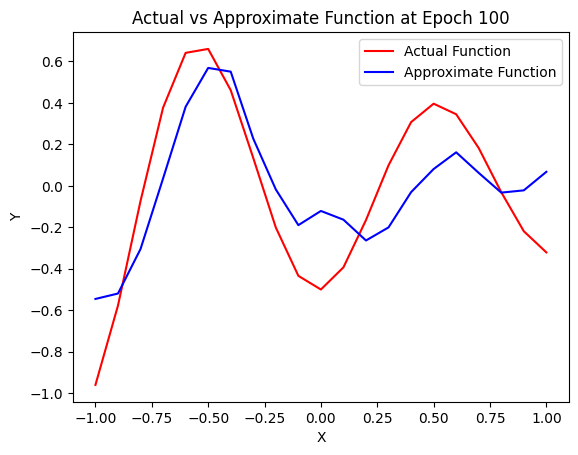

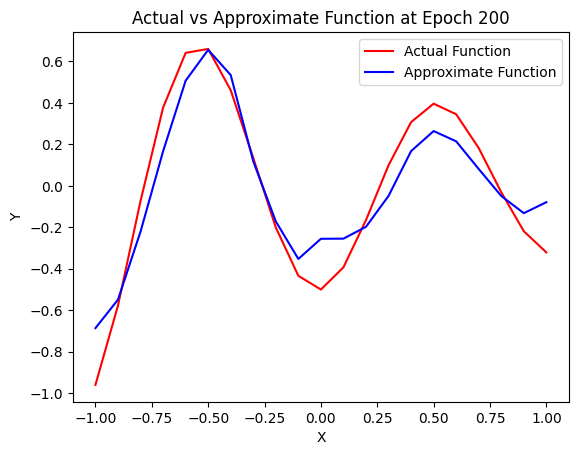

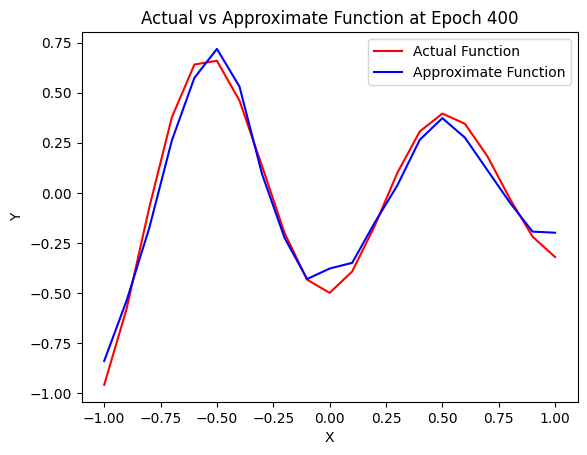

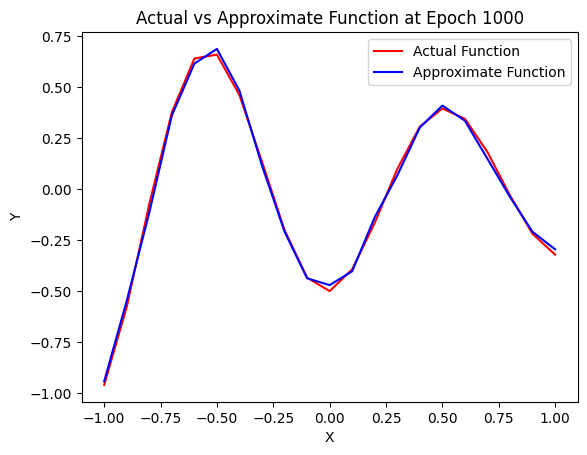

In [63]:
#Plot for specified epochs
for epoch_num in epoch_check:
    plt.figure()
    plt.plot(X, Y, 'r-', label='Actual Function')
    plt.plot(X, forward_propagation(X.reshape(-1, 1), w1_epoch[epoch_num], b1_epoch[epoch_num], w2_epoch[epoch_num], b2_epoch[epoch_num]).flatten(), 'b-', label=f'Approximate Function')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title(f'Actual vs Approximate Function at Epoch {epoch_num}')
    plt.show()